In [4]:
# 데이터 준비
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# 컬럼별 고윳값 확인 코드 만들기 unique
#for i in beoseot.columns:
#    print(f"{i}의 종류 : {beoseot[i].unique()}\n")
# 탐색적방법


네, 주신 `mushrooms.csv` 파일을 전처리하는 것이 좋습니다. 다음과 같은 이유로 전처리가 필요할 수 있습니다:

1. **결측값 처리**: 설명에 따르면, 데이터에는 2480개의 결측값이 존재합니다. 이 결측값은 기둥 속성(stalk-root)에 있으며, 모델의 정확도에 영향을 줄 수 있으므로 이를 처리해야 합니다.

2. **카테고리 인코딩**: 모든 속성들이 명목형(nominal) 데이터로 이루어져 있기 때문에, 머신러닝 모델에 적용하기 위해서는 이들을 수치형 데이터로 변환하는 과정이 필요합니다. 일반적으로 원-핫 인코딩(One-Hot Encoding) 방식이 사용됩니다.

3. **데이터 정규화 또는 표준화**: 만약 모델이 거리에 기반한 알고리즘(예: K-최근접 이웃(KNN))이라면, 데이터 정규화 또는 표준화가 필요할 수 있습니다. 이는 각 속성의 값의 범위를 동일하게 하여 모델의 학습 효율성을 높이는 데 도움이 됩니다.

4. **불균형 데이터 처리**: 데이터가 약간 불균형한 편(식용: 51.8%, 독성: 48.2%)이므로, 특정 모델에서는 이를 고려한 처리(예: 샘플링 기법)도 필요할 수 있습니다.

이 전처리 단계를 거친 후, 모델 학습에 더 적합한 데이터셋을 얻을 수 있습니다.

In [5]:
FILE = '../data/mushrooms.csv'
mushdf = pd.read_csv(FILE)
mushdf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
# 각 컬럼별로 '?' 문자가 있는지 확인
for column in mushdf.columns:
    question_mark_count = (mushdf[column] == '?').sum()
    if question_mark_count > 0:
        print(f"컬럼 '{column}'에서 '?' 문자가 {question_mark_count}개 발견되었습니다.")
    else:
        print(f"컬럼 '{column}'에서 '?' 문자가 없습니다.")

print(mushdf.duplicated().sum())


컬럼 'class'에서 '?' 문자가 없습니다.
컬럼 'cap-shape'에서 '?' 문자가 없습니다.
컬럼 'cap-surface'에서 '?' 문자가 없습니다.
컬럼 'cap-color'에서 '?' 문자가 없습니다.
컬럼 'bruises'에서 '?' 문자가 없습니다.
컬럼 'odor'에서 '?' 문자가 없습니다.
컬럼 'gill-attachment'에서 '?' 문자가 없습니다.
컬럼 'gill-spacing'에서 '?' 문자가 없습니다.
컬럼 'gill-size'에서 '?' 문자가 없습니다.
컬럼 'gill-color'에서 '?' 문자가 없습니다.
컬럼 'stalk-shape'에서 '?' 문자가 없습니다.
컬럼 'stalk-root'에서 '?' 문자가 2480개 발견되었습니다.
컬럼 'stalk-surface-above-ring'에서 '?' 문자가 없습니다.
컬럼 'stalk-surface-below-ring'에서 '?' 문자가 없습니다.
컬럼 'stalk-color-above-ring'에서 '?' 문자가 없습니다.
컬럼 'stalk-color-below-ring'에서 '?' 문자가 없습니다.
컬럼 'veil-type'에서 '?' 문자가 없습니다.
컬럼 'veil-color'에서 '?' 문자가 없습니다.
컬럼 'ring-number'에서 '?' 문자가 없습니다.
컬럼 'ring-type'에서 '?' 문자가 없습니다.
컬럼 'spore-print-color'에서 '?' 문자가 없습니다.
컬럼 'population'에서 '?' 문자가 없습니다.
컬럼 'habitat'에서 '?' 문자가 없습니다.
0


"stalk-root" 속성의 결측치를 삭제하는 것은 가능하지만, 이 컬럼이 데이터 분석에 중요한 역할을 할 가능성이 있으므로 주의가 필요합니다. 결측치를 단순히 삭제할 경우 데이터의 중요한 특성이 손실될 수 있습니다.

대신, 결측치를 삭제하지 않고 다른 방법으로 처리하는 것을 고려해볼 수 있습니다. 예를 들어:

1. **대체(임퓨테이션)**: 결측치를 대체하는 방법이 있습니다. 일반적인 방법으로는 가장 빈도가 높은 값을 사용하거나, 다른 피쳐와의 상관관계를 고려해 대체하는 방법이 있습니다.
  
2. **모델링 후 확인**: 만약 이 컬럼이 분석에 큰 영향을 미치지 않는다면, 결측치를 삭제하는 것이 성능에 큰 영향을 주지 않을 수 있습니다. 이 경우, 모델을 먼저 생성해보고 이 컬럼의 중요도를 평가한 뒤 결정을 내릴 수 있습니다.

결론적으로, **결측치 처리를 어떻게 할지 결정하기 전에 "stalk-root" 컬럼의 중요성을 평가해보는 것이 좋습니다**. 만약 데이터의 많은 부분을 차지하는 결측치가 분석에 큰 영향을 미치지 않는다면 삭제하는 것이 간단한 방법이 될 수 있습니다. 

만약 결정하기 어렵다면, 두 가지 방법을 모두 시도해보고 결과를 비교하는 것도 좋은 방법입니다.

0       5
1       1
2       3
3       5
4       1
       ..
8119    2
8120    2
8121    2
8122    2
8123    2
Name: habitat, Length: 8124, dtype: int32


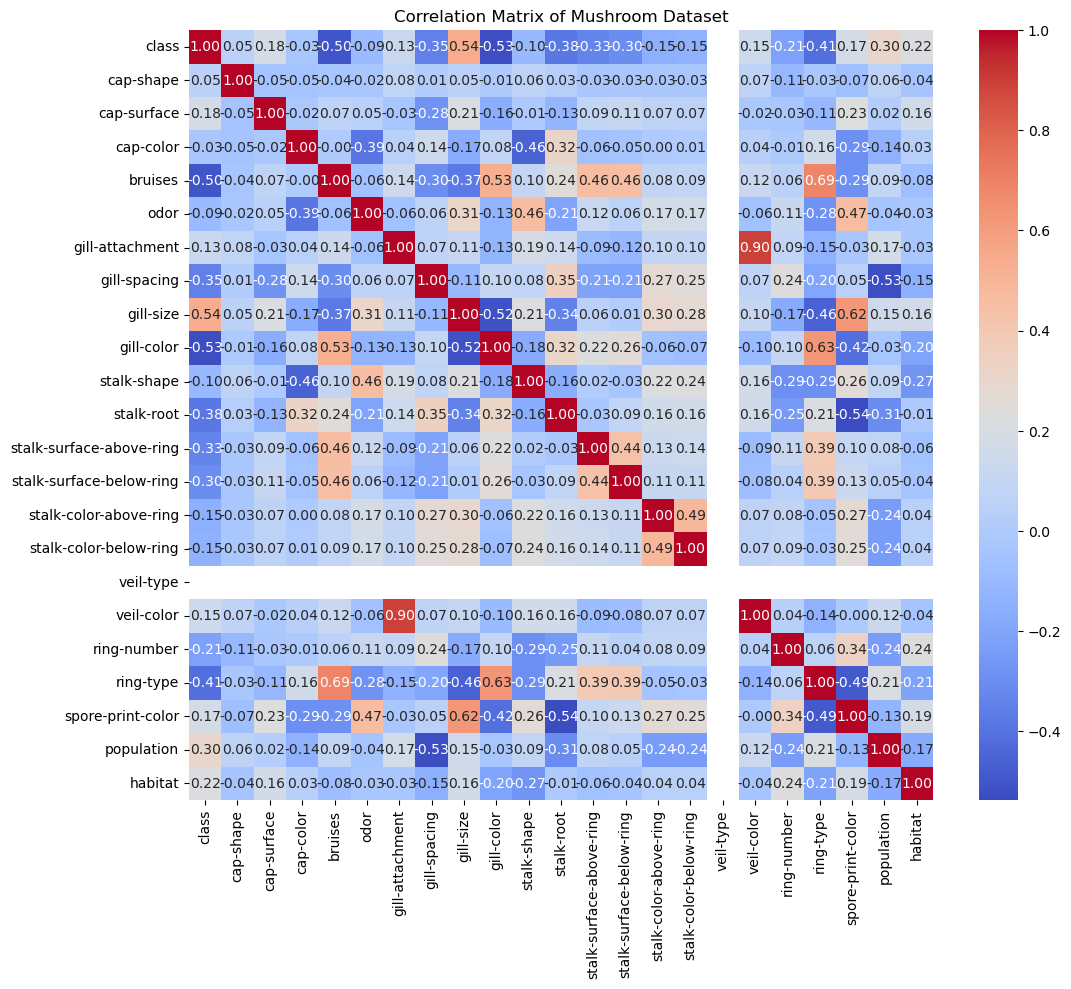

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼의 모든 데이터가 숫자형이 아닌 경우 Label Encoding을 사용하여 숫자로 변환해야 합니다.
# 여기서는 모든 컬럼을 Label Encoding으로 변환합니다.
from sklearn.preprocessing import LabelEncoder

# 모든 컬럼에 대해 Label Encoding을 수행합니다.
label_encoder = LabelEncoder()
for column in mushdf.columns:
    mushdf[column] = label_encoder.fit_transform(mushdf[column])

print(mushdf[column])

# 상관관계 행렬 계산
corr_matrix = mushdf.corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Mushroom Dataset')
plt.show()


In [8]:
corr_matrix
for column in corr_matrix.columns:
    corr_plus = (corr_matrix[column] > 0.4).sum()
    corr_minus = (corr_matrix[column] < -0.4).sum()

    if (corr_plus or corr_minus) > 0:
        print(f"컬럼 '{column}'에서 0.4이상의 상관계수가 {corr_plus}개 발견되었습니다.")
        print(f"컬럼 '{column}'에서 -0.5이하의 상관계수가 {corr_minus}개 발견되었습니다.")
        print('-' * 100)


컬럼 'class'에서 0.4이상의 상관계수가 2개 발견되었습니다.
컬럼 'class'에서 -0.5이하의 상관계수가 3개 발견되었습니다.
----------------------------------------------------------------------------------------------------
컬럼 'cap-shape'에서 0.4이상의 상관계수가 1개 발견되었습니다.
컬럼 'cap-shape'에서 -0.5이하의 상관계수가 0개 발견되었습니다.
----------------------------------------------------------------------------------------------------
컬럼 'cap-surface'에서 0.4이상의 상관계수가 1개 발견되었습니다.
컬럼 'cap-surface'에서 -0.5이하의 상관계수가 0개 발견되었습니다.
----------------------------------------------------------------------------------------------------
컬럼 'cap-color'에서 0.4이상의 상관계수가 1개 발견되었습니다.
컬럼 'cap-color'에서 -0.5이하의 상관계수가 1개 발견되었습니다.
----------------------------------------------------------------------------------------------------
컬럼 'bruises'에서 0.4이상의 상관계수가 5개 발견되었습니다.
컬럼 'bruises'에서 -0.5이하의 상관계수가 1개 발견되었습니다.
----------------------------------------------------------------------------------------------------
컬럼 'odor'에서 0.4이상의 상관계수가 3개 발견되었습니다.
컬럼 'odor'에서 -0.5이하의 상관계수가 0개 발견되었습니다.
---

In [9]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 예시: 다중 공선성을 검사할 데이터프레임
X = mushdf

# 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                     Feature         VIF
0                      const  201.488586
1                      class    3.895357
2                  cap-shape    1.043158
3                cap-surface    1.267165
4                  cap-color    1.566511
5                    bruises    6.632397
6                       odor    1.874323
7            gill-attachment    6.958189
8               gill-spacing    4.582363
9                  gill-size    4.964150
10                gill-color    2.314428
11               stalk-shape    4.650655
12                stalk-root    4.163067
13  stalk-surface-above-ring    1.770733
14  stalk-surface-below-ring    1.828352
15    stalk-color-above-ring    1.690924
16    stalk-color-below-ring    1.697813
17                 veil-type         NaN
18                veil-color    5.710267
19               ring-number    4.503577
20                 ring-type    5.497168
21         spore-print-color    5.377458
22                population    2.319993
23              

c:\Users\KDP-26\anaconda3\envs\ML_38\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [10]:
# 피처와 타겟 분리
featuredf = mushdf.drop(['class'], axis=1)
target = mushdf['class']

print(featuredf.shape)
print(target.shape)

X_train, X_test, y_train, y_test = train_test_split(featuredf, target, random_state=10, stratify=target)
print(f'Xtrain : {X_train.shape}')
print(f'ytrain : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

(8124, 22)
(8124,)
Xtrain : (6093, 22)
ytrain : (6093,)
X_test : (2031, 22)
y_test : (2031,)


In [12]:
# 모델 인스턴스 생성
kmodel = KNeighborsClassifier()
Lmodel = LogisticRegression(solver='liblinear')
DTmodel = DecisionTreeClassifier(random_state=5)

# 보팅 인스턴스 생성
Vmodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='hard')

V_smodel = VotingClassifier(estimators=[('kmodel', kmodel), ('DTmodel', DTmodel), ('Lmodel', Lmodel)], voting='soft')

# 학습 진행
Vmodel.fit(X_train.values, y_train.values) # Hard 직접
V_smodel.fit(X_train.values, y_train.values) # soft 간접 모델 마다의 확률값을 더함

# 모델 파라미터 확인
print(f'[Vmodel.classes_] : {Vmodel.classes_}')
print(f'[Vmodel.estimators_] : {Vmodel.estimators_}')
print(f'[Vmodel.named_estimators_] : {Vmodel.named_estimators_}')
print('-'*100)
print(f'[Vmodel.n_features_in_] : {Vmodel.n_features_in_}')
print('-'*100)

# 성능 확인 --> train과 validation 이 없어서 train 과 test를 함
train_score = Vmodel.score(X_train.values, y_train.values)
test_score = Vmodel.score(X_test.values, y_test.values)

vstrain_score = V_smodel.score(X_train.values, y_train.values)
vstest_score = V_smodel.score(X_test.values, y_test.values)

print('Hard')
print(train_score)
print(test_score)
print('Soft')
print(vstrain_score)
print(vstest_score)

[Vmodel.classes_] : [0 1]
[Vmodel.estimators_] : [KNeighborsClassifier(), DecisionTreeClassifier(random_state=5), LogisticRegression(solver='liblinear')]
[Vmodel.named_estimators_] : {'kmodel': KNeighborsClassifier(), 'DTmodel': DecisionTreeClassifier(random_state=5), 'Lmodel': LogisticRegression(solver='liblinear')}
----------------------------------------------------------------------------------------------------
[Vmodel.n_features_in_] : 22
----------------------------------------------------------------------------------------------------
Hard
1.0
1.0
Soft
1.0
1.0
